In [224]:
# 레이블 목록
labels_dic = {
    "수": 0,
    "덧셈": 1,
    "뺄셈": 2,
    "곱셈": 3,
    "나눗셈": 4,
    "분수": 5,
    "소수": 6,
    "소수점": 7,
    "길이": 8,
    "시간": 9,
    "화폐": 10,
    "측정": 11,
    "각도": 12,
    "평면도형": 13,
    "입체도형": 14,
    "도형": 15,
    "대칭": 16,
    "원": 17,
    "직각": 18,
    "비율": 19,
    "비례식": 20,
    "비": 21,
    "그래프": 22,
    "통계": 23,
    "확률": 24,
    "약수": 25,
    "배수": 26,
    "함수": 27,
    "미지수": 28,
    "규칙": 29,
}

In [225]:
# 1,2,3,4,5,6,7,25,26 => 수와 연산

# 15,13,14,17,16 => 도형

# 8,9,10,11,12,18 => 측정

# 19,20,21,29 => 규칙성

# 22,23,24 => 확률과 통계

In [2]:
import pandas as pd

df = pd.read_csv('./final.csv')

In [3]:
df.loc[df['category'] == '확률과 통계', 'combined_list']

20     ['브리', '시험', '운전', '데이터', '산포도', '수업', '바로', '...
69     ['통계', '데이터', '하기를', '포인트', '가서', '라면', '보는', ...
127    ['제일', '동현', '무조건', '부모', '부회장', '시간', '보면', '...
Name: combined_list, dtype: object

In [5]:
df['text'][0]

'이 텍스트를 한국어로 번역: \n\nGavin은 이런 말들이 있습니다. 아래의 각 사진에 있는 말의 수가 Gavin이 가진 말의 수보다 많은지, 적은지, 아니면 같은지 알아봅시다. 그러니 우선 Gavin이 얼마나 많은 말을 가지고 있는지 봅시다. 그는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 좋습니다, 그것을 기억합시다. 그리고 이런 양의 말을 Gavin이 가진 여섯 마리의 말과 비교합시다. 그럼 여기를 봅시다. 여기서 우리는 하나, 둘, 셋, 넷, 다섯, 여섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 수와 같습니다. 그들은 단지 다르게 배열되어 있을 뿐입니다. 그래서 이것은 같습니다. 우리는 같은 양에 놓겠습니다. \n\n이제 여기서는 하나, 둘, 셋, 넷, 다섯 마리의 말을 가지고 있습니다. 그래서 이것은 Gavin이 가진 여섯 마리의 말보다 적습니다. 다섯은 여섯보다 적습니다. 이제 하나, 둘, 셋, 넷, 다섯과 다른 다섯, 즉 십 마리의 말을 볼 수 있습니다. 또는 하나, 둘, 셋, 넷, 다섯, 여섯, 일곱, 여덟, 아홉, 십으로 셀 수 있습니다. 줄곧, 십은 여섯보다 많습니다.. 십은 여섯보다 많으므로, 더 많은 양에 놓겠습니다.\n\n이제 여기에 넷과 넷이 있습니다. 그것은... 하나, 둘, 셋, 넷, 다섯, 여섯, 칠, 팔입니다. 다시 말해, 이것은 여기의 여섯보다 더 많습니다. 그것은 여섯보다 많습니다. 그리고 여기서 우리는 하나, 둘, 셋, 넷의 말을 가지고 있습니다. 그럼, 넷은 여섯보다 적습니다. 그래서 그것을 적은 양에 놓겠습니다. 그냥 이렇게. 그리고 우리의 대답을 확인해봅시다. 어떻게 했는지 알아봅시다. 고마워요. 우린 맞았구나.'

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('./final.csv')

# Step 1: Preprocess the text data (if needed, apply basic cleaning)
texts = df['text'].values
labels = df['category'].values

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(texts).toarray()  # Convert sparse matrix to dense

# Step 3: Encode the labels using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(labels)  # Transform categories to integer labels

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(labels.reshape(-1, 1))  # One-hot encode the integer labels

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Step 5: Build a simple Dense Neural Network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.2)

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Step 8: Predict and calculate accuracy using sklearn's accuracy_score
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_classes)}")


Epoch 1/10


d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


21/21 [==============================] - 1s 33ms/step - loss: 1.3517 - accuracy: 0.7073 - val_loss: 0.9088 - val_accuracy: 0.7619
Epoch 2/10
21/21 [==============================] - 1s 29ms/step - loss: 0.5975 - accuracy: 0.8171 - val_loss: 0.8256 - val_accuracy: 0.7619
Epoch 3/10
21/21 [==============================] - 1s 28ms/step - loss: 0.4446 - accuracy: 0.8171 - val_loss: 0.7208 - val_accuracy: 0.7619
Epoch 4/10
21/21 [==============================] - 1s 29ms/step - loss: 0.3214 - accuracy: 0.8293 - val_loss: 0.6988 - val_accuracy: 0.7619
Epoch 5/10
21/21 [==============================] - 1s 27ms/step - loss: 0.2539 - accuracy: 0.8780 - val_loss: 0.7031 - val_accuracy: 0.8095
Epoch 6/10
21/21 [==============================] - 1s 27ms/step - loss: 0.1977 - accuracy: 0.9268 - val_loss: 0.7000 - val_accuracy: 0.8095
Epoch 7/10
21/21 [==============================] - 1s 27ms/step - loss: 0.1585 - accuracy: 0.9512 - val_loss: 0.7221 - val_accuracy: 0.7619
Epoch 8/10
21/21 [======

In [106]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

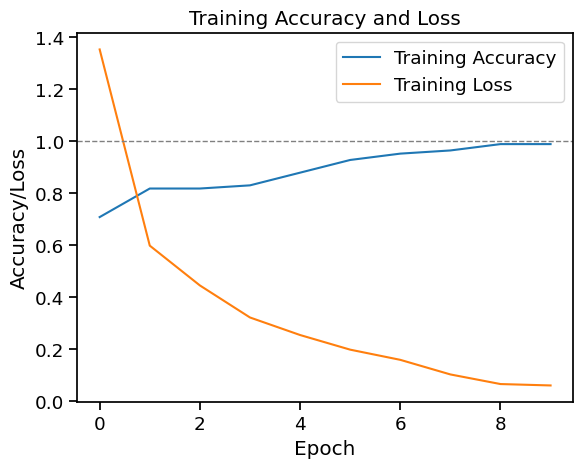

In [12]:
import matplotlib.pyplot as plt



plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

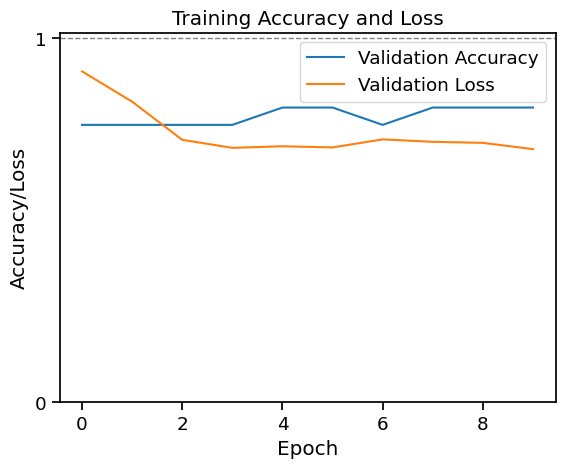

In [15]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.yticks([0,1])
plt.legend()
plt.show()

d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  fig.canvas.draw()
d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52825 (\N{HANGUL SYLLABLE CIG}) missing from current font.
  fig.canvas.draw()
d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.draw()
d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages

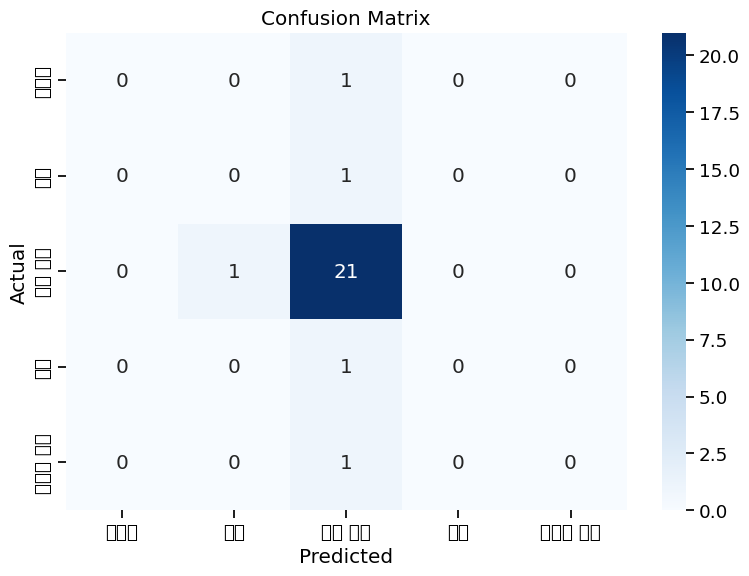

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Adjust Seaborn context to increase all font sizes slightly
sns.set_context("notebook", font_scale=1.2)  # Slightly smaller than 1.3

# Step 2: Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Step 3: Adjust the figure size (set to a proportion that fits better)
plt.figure(figsize=(8, 6))  # Slightly smaller than 13,10

# Step 4: Plot the confusion matrix with adjusted font size and graph size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix')  # Adjusted to fit better
plt.ylabel('Actual')  # Adjusted to fit better
plt.xlabel('Predicted')  # Adjusted to fit better
plt.tight_layout()  # Adjust layout to fit everything more neatly
plt.show()


In [110]:
# 새로운 텍스트 데이터 (리스트로 여러 개를 테스트할 수 있음)
new_texts = ["""친한 친구 맞춰봐 왔어? 잠깐만 신난다 아파 어 뒤엣개 갖고 운동한 것 보세요 Ну 그렇지 영화 좋죠 장난이 아니라고 안올리는 거 어떤 시간 보내고 있나요? 선생님과 이번 시간은요 길이와 시간 이라는 것에 대해서 알아볼 거에요 그런데 길이라고 하는 건 사실 우리가 수학의 여러가지 영역 중에서 측정에 관련된 영역이다 라고 얘기를 해요 측정이라는 것은 무엇인가를 재어 나타내는 활동이기 때문에 길이도 가능하고 또 시간이라든지 무게, 들이 이렇게 너무나 다양한 것들이 측정의 영역에 속한다라고 할 수 있어요 사실 길이에 대한 것은 또는 시간에 대한 학습은요 초등학교 3학년 교과까지 학습을 통해서 모두 마무리 지어집니다 그러면 4학년, 5학년, 6학년 때는요 이미 마무리 지어졌던 내용들을 바탕해서 다양한 활용의 문제들을 만나게 되는 것이죠 기초가 탄탄해야겠죠 어떤 내용들이 있는지 확인해 볼 거에요 학습 목표부터 소개해 드립니다 첫 번째 개념의 내용, 제목에서 길이의 단위와 합과 차 라는 것이 보이고 있죠 길이의 단위라고 한다면 재어내는 활동에는 모두 단위가 나오게 돼요 측정의 영역에서 사용되는 단위다 라고 볼 수 있는데요 그런데 우리 배운 내용부터 간략하게 살펴볼 거에요 어떤 내용을 배웠었냐면 같은 단위를 사용하는데 그 말에 여러가지 표현들이 있는 경우 우리 이런 얘기를 하죠 길이라고 하는 건 그 길이를 재어 나타내 줄 때 길다, 짧다 라는 말을 쓸 수가 있었어요 그런데요 이 길이를 재어 나타내는 단위를 똑같이 사용하는데 단어의 뜻은 단어는 좀 다르게 표현하는 경우가 있단 말이에요 그래서 이때 거리라는 것에 대해서 얘기를 할 때에도 거리가 멀다 또는 우리는 거리가 가깝다 라는 이와 같은 표현을 쓰게 되죠 단위는 역시 같게 사용을 하는데 이거 말고도 있어요 우리가 깊이를 표현해 줄 때에는요 깊이가 깊다 그리고 얕다 라는 표현을 사용해 줄 수 있었죠 이렇게요 또 말고 또 있어요 높이도 있어요 건물의 높이를 얘기할 때에도 역시 같은 단위를 쓰는 것 같지만 그 단어를 쓸 때에는 높이가 높다 그리고 낮다 이런 표현을 쓸 수 있게 되는 거죠 또 어떤 것이 있을까요 우리 사람이 키요 키를 얘기할 때도요 키가 크다 작다 이와 같은 표현들을 사용해 줄 수 있었던 거죠 이렇게 우리가 길이라는 단위에 대해서 학습을 하기에 앞서서 배운 내용 중에는 어떠한 표현의 방법들이 있었는지를 확인해 보는 것이 필요할 거예요 그래서 이와 같이 배운 내용을 간략하게 살펴보았죠 수학 시간인데 마치 국어 시간처럼 이렇게 단어의 여러 가지 표현의 방법에 대해서 얘기를 해보는 시간이었고요 그러면 이제 여러분들께 길이의 단위라고 하는 것을 본격적으로 소개해 드리도록 할게요 그러면 길이의 단위에는요 이런 것들이 있어요 cm 그리고요 또 우리 미터라고 하는 단위도 있죠 그리고 킬로미터라는 단위도 있고 그 다음에 밀리미터 이와 같은 단위들이 있단 말이에요 이 각각을 읽어서 나타내 줄 때에도 cm, m, km, mm 라고 읽어서 나타내 주면 됩니다 이와 같이 길이의 단위들에 대해서 얘기를 해볼 수 있는데요 그러면 이 단위들 사이에는 어떠한 약속이 나타나지게 되는지 그와 같은 것을 이해해 볼 필요가 있겠네요 제일 먼저 1cm 라고 하는 것은 우리 10mm와 같습니다 라고 얘기를 하게 되고 그 다음에 기억해야 할 거 있죠 1m는 100cm와 같습니다 라고 얘기를 해 줄 거예요 그 다음에 세 번째 1km는 1000m와 같습니다 라고 단위 사이에 그 관계, 약속을 기억하여서 다양한 문제를 푸는 데 있어 활용을 해 주어야 해요 요 3가지만 기억을 한다면 길이의 웬만한 문제들은 모두 쉽게 해결되는 것이죠 이와 같이 길이의 단위들 이라는 것에 대해서 얘기를 해 보았어요 단위 4가지 꼭 기억을 해 두시고요 그런데 이때 km 라고 하는 건요 보통 길이에서도 표현을 하기는 하지만 비교적 먼 거리를 나타내 줄 때 주로 쓸 수 있는 단위가 되어집니다 이와 같이 단위들에 대해서 함께 살펴 보았고요 그 다음에 우리 제목에서 보였던 것처럼 길이의 합과 차라는 것에 대해서 확인해 보아야겠죠 길이의 합과 차는 굉장히 간단해요 같은 단위끼리 더해서 표현합시다 이렇게 기억을 해 주시면 되는데 선생님이 복잡한 유형 두 가지만 여기서 소개를 해 드릴게요 하나는 2km 예를 들어서 200m 에다가 더하기 3km 900m 입니다 라는 표현이 주어져 있다면 보통 이와 같은 경우는 우리가 길이의 합 또는 거리의 합 이라고 표현을 하게 되는데요 같은 단위끼리 더하여라 미터 끼리 더해 주었더니 이때 나오는 값이 1100이고 킬로미터 끼리 더해 주었더니 이때 나오는 값이 5가 되더라 그런데 이런 상태로는 답을 쓰지 않을 거란 말이에요 따라서 여기서 1000m 만큼을 빼어내어서 그것을 1km 로 올려주고 더해 줍시다 이와 같이 표현을 해 줍니다 따라서 1100에서 1000을 빼어서 100m 가 되어줬죠 그 다음에 1km 올라갔으니까 더해서 6km 가 되었다 이와 같이 더해서 나온 값이 1000m 이거나 1000보다 더 큰 값이 나왔을 때 이렇게 1100m 나왔을 때 1000m 만큼을 1km 라고 해서 이렇게 올려주고 난 다음에 계산을 해 주세요 그러면 반대로 이번에는 차를 한번 확인해 볼 텐데요 이번에 확인할 것은 3m 90cm 에서 1m 예를 들어 95cm 만큼을 빼려고 한다 그러면 이때는 같은 단위끼리 빼야 하는데 90에서 95를 뺄 수 없단 말이죠 따라서 이런 경우라면 1m 를 100cm 로 만들어 주고 190에서 95만큼을 빼어 주는 것으로 이때 나오는 값을 이와 같이 얼마로 표현해 주면 되는 걸까요 100에서 95 빼면 5 남죠 90을 더하니까 95cm 2에서 1을 빼어 1m 이와 같이 표현해 주면 되는 것이고요 따라서 역시나 1m 를 100cm 로 받아 내림하여 계산이 이루어졌다 라는 것만 기억해 두면 되는 거예요 길이의 합과 차 그다지 어려운 내용은 아니죠 길이의 합과 차를 구할 때는요 이처럼 같은 단위끼리 계산을 해 주시면 된다라는 거 받아 올린 것이 있는지 또는 받아 내려서 계산을 해 주었는지 이와 같은 것들만해주었는지 이와 같은 것들만 정확하게 구분해 주세요 그러면 이 개념을 확실하게 다잡아 줄 문제들 만나 볼까요 문제에서는 아래의 그림은 연우가 산 입구에서 약수터를 지나 꼭대기까지 올라간 거리입니다 연우가 산 입구에서 꼭대기까지 올라간 거리는 몇 킬로미터 몇 미터인지 프리과정을 쓰고 답을 구하시오라고 얘기를 했죠 그러면 보통 이런 문제는요 프리과정 중에 식이 포함이 되어질 거예요 우리가 구하고 싶은 건 산 입구에서 꼭대기까지의 거리를 구하려고 하는 것인데 그러다 보니까 산 입구에서 약수터까지의 거리에다가 약수터에서 꼭대기까지의 거리의 합을 구하는 것으로 문제를 해결해 볼 수 있고 그럼 이와 같이 프리과정 우리가 그 해결의 전략을 밝혔으니까 750에다가 800만큼을 더하게 되는 거죠 그런데 750은 단위가 미터고요 800도 단위가 미터란 말이에요 더하면 1550미터라는 값이 나오게 될 텐데 이것을 우리가 1km 550미터 입니다 라고 표현할 수 있게 되는 것이죠 따라서 프리과정은 이와 같이 적어주는 거고요 그 답을 구하여 답하여 1km 550미터 입니다 라고 표현해 둘 수 있어요 문제에서 묻고 있는 단위로 표현하여서 문제를 해결해 주어야죠 잘 풀었지만 그 답을 1550미터라고 한다면 문제에서 요구하는 그 단위가 잘못되었기 때문에 오답으로 처리된다는 것 꼭 기억해 두세요 이와 같이 여러분과 문제 해결해 보았습니다 문장 형태의 문제이지만 요렇게 식을 정확히 세워 주시면 되는 거예요 이번에 만나볼 거는요 창문에 가로의 길이가 주어졌고 세로의 길이도 주어져 있어요 가로 854mm 세로 67cm 5mm 물음에 답하슈 창문의 가로와 세로의 길이 합은 몇 cm 몇 mm 입니까 몇 mm 입니까 라고 묻지 않았죠 몇 cm 몇 mm 입니까 라고 물어보았기 때문에 문제 해결을 위한 물론 방법은 다양하게 있을 수 있겠지만 가로 854mm 라고 하는 걸 단위를 바꿔서 표현해 주세요 10mm 가 1cm 이기 때문에 85cm 4mm 입니다 라고 표현해 둘 수 있고 따라서 가로 85cm 4mm에 세로 67cm 5mm 만큼을 더해 주는 것으로 그런데 이때도 역시 같은 단위끼리 더하여서 4와 5를 더해 9cm 끼리 더합니다 2가 되고 5가 되고 1이 되었죠 따라서 이때 가로와 세로의 길이의 합은 152cm 9mm 이와 같이 표현해 둘 수 있게 돼요 같은 단위끼리 계산하는데 우리가 원하는 답에서 원하는 단위의 형태로 바꿔서 더해 주는 것으로 문제를 해결해 보세요 이와 같이 역시 문장형으로 주어진 것 함께 해결해 보았어요 그러면 이런 문제 말고요 또 하나 문제 만나볼까요 기억리온에 들어갈 알맞은 수를 구하는 문제라고 볼 수 있겠죠 그런데 이 문제는 그렇게 어려운 문제는 아니에요 같은 단위끼리라고 얘기를 했으니까 몇 km 650m 에다 16km 니은미터 요거를 이제 더해 주는 거란 말이죠 미터길이 더하였는데 650에 무엇을 더했더니 650보다 작은 수 500이 나왔어요 이 얘기는 그렇죠 바로 1000m 가 되어서 1km 로 올라갔다 라는 걸 말해주고 있는 거예요 그렇기 때문에 여러분이 확인해 주어야 할 것은 650 에다가 무엇을 더하면 이 값이 500이 아니라 1500이 되었겠느냐라는 것이구요 반대로 1500에서 650만큼을 빼어서 나온 값을 확인해 보시면 니은에 들어갈 알맞은 수는 바로 850으로 표현이 되어진다 라는 걸 알 수 있어요 850을 더함으로 인해서 1000m 가 1km 가 되어졌던 것이죠 그러면 1과 16을 더해서 17 그러면 이 기억 안에 들어갈 것은 7 이라고 얘기할 수 있겠지요 이와 같이 표현하였더니 기억에 들어갈 것은 7이 되어지고 니은에 들어갈 것은 850 이다라고 표현해 둘 수 있습니다 이와 같이 같은 단위끼리 계산해야 한다라는 그 계산의 원리를 익혀두면 되는 거예요 첫번째 개념 마무리 짓겠습니다 다시 보기를 통해서 정리할게요 두번째 개념 제목에서 시간의 단위와 학과 차아라고 얘기를 하고 있죠 시간의 단위다 그러면 우리 1학년 때부터 사실 쭉 거쳐오면서 시계보는 거 많이 배웠잖아요 정시라는 것도 배웠구요 몇시 30분 이라는 것에 대해서도 학습을 했었어요 또 분단위에 대한 학습들도 쭉 해결을 했었단 말이죠 그러면 우리는 시간이라는 것을 재어 나타내기 위해서 어떤 단위들을 썼었느냐 시라는 단위도 쓸 수 있었구요 또 분이라고 하는 것도 사용해 볼 수 있구요 또 초라고 하는 것도 사용해 볼 수 있었다라는 것이죠 바로 이것이 우리가 원하는 시간의 단위에요 그래서 예를 들어서 3시입니다 라고 얘기를 한다면 긴 바늘과 짧은 바늘의 위치를 통하여서 그 시각을 읽는다라는 것을 얘기해 볼 수 있구요 그 다음에 분입니다 라고 얘기를 했을 때 예를 들어서 그러면 3시 10분입니다 라고 표현을 하게 된다면 이때 우리는 긴 바늘과 짧은 바늘의 위치에서 긴 바늘은 숫자 2를 가리키고 10분을 나타낼 거니까 짧은 바늘이 숫자 3과 4 사이를 가리키되 10분이기 때문에 짧은 바늘은 사실 3에 더 가까운 위치를 가리킨다 라고 말할 수 있어요 그 다음에 이제 초에 대해서까지 학습이 이루어지면 시간의 단위라는 것은 모두 해결이 되죠 그래서 이때 이런 일을 한번 들어볼게요 1시 10분 예를 들어서 30초 입니다 그러면 30초를 나타낸다 그러면 초바늘이 가리키는 숫자는 큰 숫자 6을 가리키게 되더라 이와 같이 시간의 단위라는 것에 대해서 얘기를 해 볼 수 있게 돼요 이 단위들이 어느 시계에서 시곗바늘이 어디를 가리키는가에 따라서 각각의 표현들이 달라질 수 있다는 것 기억해 두시면 되겠죠 더불어서 너무나 중요한 것이 있어요 그게 뭐냐 얘네들 사이의 관계라는 것이 대단히 중요해요 그렇다면 한 시간 이라고 하는거 이것은 60분과 같다 라고 말할 수 있구요 1분 이라고 하는 것은 60초와 같습니다 라고 얘기를 합니다 요것을 알고 있어야 여러분은 시간에 관련된 다양한 활용 문제를 해결할 수 있게 되는 거에요 그런데요 역시 조금 더 앞서서 이것도역시 조금 더 앞서서 이것도 기억해 두세요 한 시간은 그래서 초로 바꾸면 3600초가 되는 것이다 조금 더 어려운 심화형 문제에서는요 시간을 분으로 분을 초로 바꾸는 이런 단계를 넘어서서 시간을 바로 초로 고치는 형태의 문제들도 많이 만날 수 있기 때문에 한 시간은 3600초와 같다라는 것 기억해 둬야 해요 시간의 단위에 어떤 표현의 방법들이 있는지 확인해 보았구요 그들 사이의 관계에 대해서도 얘기를 해보았어요 더불어서 우리 시각, 시라고 하는 건 언어한 시점을 말하는 거구요 시간이라고 하는 건 시각과 시각의 사이를 말해주는 것이다라는 것 구분해 두셔야겠죠 시간의 단위를 확인해 보았어요 그럼 이번에는 시간의 학과 차라는 거 살펴볼게요 앞서서 길이의 학과 차에 대해서 얘기를 한 것처럼 시간의 학과 차도 역시 마찬가지 같은 단위끼리 계산을 해주는 건데요 이것도요 예를 한번 들어볼게요 예를 들어서 2시 그 다음에 20분 10초에다가 더해 줍시다 3시간 15분 55초만큼을 이런 문제가 주어져 있다면 같은 단위끼리 더하기로 했죠 초하고 초를 더해서 이 값을 65초라고 적어 주었는데 분 끼리 더하니까 35분이고 2시에다가 3시간을 더했을 때 나오는 단위는 5시라고 표현이 되어져야죠 따라서 5시 35분 65초입니다 라고 이렇게 쓸 수가 있는데 다만 답은 이렇게 표현하지 않아요 왜냐하면 60초 만큼을 빼어서 1분으로 더해 줄 거기 때문이죠 따라서 이때 우리는 시간의 합을 구하여서 5초 그 다음 분 끼리 더해서 36분 5시 36분 5초를 나타내 줍니다 라고 말할 수 있게 돼요 같은 단위끼리 더했는데 60이거나 60보다 크면 바로 윗자리로 받아 올리마여 표현해 주시면 되는 거예요 시간의 합에 대해서 얘기를 해보았구요 그럼 이번엔 시간의 차에 대해서 확인을 해보아야겠죠 예를 들어서 50분 12초에서 15분 50초만큼을 빼어라 라고 얘기를 한다면 초 끼리 빼고 싶으나 뺄 수 없는 상황이 벌어지니까 1분을 가져와 60초라고 표현을 해주고 72에서 50을 빼어서 나타내 주니까 22초 49에서 15를 빼내어 34분 이와 같이 같은 단위끼리 계산할 수 없을 땐 바로 윗자리에서 받아 내리마여 계산해 준다라는 원리 이것만 기억해 두시면 되겠어요 시간의 합과 차 그 내용까지 모두 정리를 해보았어요 그렇다면 이제 여러분들과 문제를 통해서 그 개념 다져보는 시간 갖도록 할까요 계산을 하시오 아주 기본적인 형태죠 초 끼리 더하겠습니다 8이 되고 8이에요 그런데 8이라고 안 적을게요 이라고 적구요 60초가 1분이 되었습니다 라고 바로 표현하도록 하겠습니다 보통 문제 풀 때는 이렇게 하니까요 14에 1을 더해 15, 15에다가 31을 더해서 47만큼이 되었어요 시간에 시간을 더하면 그 단위는 시간이 되어지므로 12시간 47분 28초라고 대답해 주게 되죠 그렇다면 또 다른 문제 이번에는 시간의 차예요 그러면 초 끼리 계산할 것이다 35에서 25를 빼어서 10이 되었고 분 끼리 빼어 줄 텐데 뺄 수가 없어서 1시간이 60분이 되었으니 65에서 45를 빼내어 20이 되었고 9에서 5를 빼는데 그 단위가 지금 시간으로 표현이 되어져 있단 말이죠 따라서 9에서 5를 빼어 4시간 이와 같이 표현하는 것으로 계산을 마무리해 줄 수 있어요 자 시간의 학과차 가장 기본적인 형태죠 실수 없도록 주의하시구요 다음 문제는 어느 날 밤의 길이가 10시간 53분 이었대요 이날 낮의 길이는 몇 시간 몇 분 이었습니까 묻고 있군요 그렇다면 하루가 24시간 이잖아요 밤의 시간을 빼버리면 낮의 시간이 나오게 되는 것이죠 따라서 낮의 길이 밤의 길이라고 질문에 따라서 하루가 24시간 인데 여기에서 밤의 길이 10시간 53분 만큼을 빼내고 남은 것이 바로 낮의 길이입니다 라고 얘기를 해 주시구요 오답이 굉장히 많습니다 53분 이라고 쓰지 않는다는 거 왜냐하면 1시간을 가지고 와서 60분으로 이렇게 표현을 해 주시고 빼내어서 7분 요거 53분 아니고 7분 이에요 23에서 10을 빼내어서 13시간 이라고 나타내 주어야죠 따라서 이날 낮의 길이는 13시간 7분 이라고 표현해 둘 수 있어요 이 문제는 요 보통은 문제가 좀 어렵게 나오는 경우가 많아요 밤의 길이 그런데 낮의 길이를 구하여라 라고 얘기를 하고 이날 낮과 밤의 길이의 차를 구해라 라는 문제까지 조금 더 어려운 형태가 진행될 수 있다라는 것 말씀드릴게요 또 다른 문제 이번에 만나볼 것은 역시 문장형으로 주어져 있는데요 1교시 시작 시각은 9시 5분 이에요 수업시간 40분 수업시간은 40분이고 쉬는 시간이 10분 이라면 4교시 수업이 끝나는 시각은 몇시 몇분입니까 라고 물어보고 있습니다 여기에서 9시 5분에 1교시가 시작했어요 수업 40분 할 거죠 그 다음에 10분을 쉰단 말이에요 그래서 우리가 총 4교시를 해야 하는 거니까 4교시 라면 40분이 1번 2번 3번 4번만큼 있을 거고 쉬는 시간은 1교시가 끝나고 10분 2교시가 끝나고 10분 그 다음에 3교시가 끝나고 10분 4교시 수업이 끝나는 시각을 물어보았기 때문에 나머지 것은 더 이상 적을 것이 없어요 40이 4개니까 160 10이 3개니까 30 그러면 190 이라는 값이 나오게 되죠 190분이다 라고 얘기를 할 수 있는 건 60분이 1시간 이기 때문에 3시간 10분을 말해주는 거에요 그만큼이 지나가야 하는 것이기 때문에 12시 15분 이것이 바로 4교시 수업이 끝나는 시각이다라는 것을 알 수 있게 됩니다 그 답을 구하여서 답표 여기 있죠 12시 15분으로 나타내어서 문제 해결했어요 두 번째 개념까지 모두 마무리 지어졌습니다 다시 보기 통해서 정리합니다 칭찬에 푹 빠져 보니 저주한 물건의 당근까지 시작된 시각은 오전 6시 12분 45초이고 해가 진 시각은 오후 5시 11분 20초입니다 이날 낮의 길이를 구하시오 밤의 길이 낮의 길이는요 문장이 굉장히 많이 나온단 말이에요 화룡문제의 가장 대표적인 건데 이런 문제를 해결하시오대표적인 건데 이런 문제를 해결할 때에는요 구하려는 게 뭘까 여기서는 낮의 길이를 구하려고 한다 구하려는 것을 먼저 표현해 두었어요 그러면 두번째 이제 무엇을 알아봐야 하는지 확인해 볼게요 두번째에서는요 여러분들과 함께 주어진 조건이라는 것에 대해서 확인을 해 줄 거에요 주어진 조건은 해가 뜬 시각이 주어져 있고 해가 진 시각이 주어진 것이다 라고 표현할 수 있습니다 문제서 찾으세요 그 다음에 세번째 주어진 조건 다음으로 식세우기가 필요해요 낮의 길이를 구하는 거기 때문에 해가 진 시각에서 뜬 시각만큼을 빼내 주어야 하는 거에요 그런데 이때 확인을 해보니까 오후 5시라고 하는 건 계산을 위해서 17시라고 바꿀 수 있다라는 거 그리고 난 다음에 여기에서 6시 12분 45초만큼을 빼면 되겠다 이와 같이 식을 세워 주세요 그 다음에 네번째 식세우기 다음으로 답구하고 확인하는 과정이 필요해요 답을 구하면 촛끼리 빼어서 나오는 값심으로 받아내림 하고 이때 35초 그 다음에 다시 받아내림이 필요하죠 그러니까 얘가 70이 되어버렸네요 빼어주니까 나오는 값은 58분 16에서 6을 빼어 10인데 이때 시에서 시를 뺐기 때문에 그 단위를 시간이라고 표현해 둘 수 있는 거에요 이와 같이 답을 구하여서 또 이 답이 맞았는지 거꾸로 더 해보시면 되겠죠 해서 처음에 값이 나온다면 이 답도 맞았다라고 표현해 줄 수 있습니다 이와 같이 응용의 문제를 해결해 줄 때에는요 구하려는 것 주어진 조건 식을 세워서 그 답을 구하는 과정까지 단계별로 해결해 주시면 되겠어요 그러면 이제 이 활용의 문제들 어떤 형태가 주어져 있는지 문제 바로 만나볼게요 길이가 8cm 6mm 인 색테이프 3장을 겹치지 않게 이어 붙였습니다 이어붙인 색테이프는 30cm 보다 얼마나 더 짧은지 구하시오라고 얘기를 했죠 이어붙인 길이를 알아야죠 길이가 8cm 6mm 라고 얘기를 했는데 겹치지도 않아요 그러니까 요거를 3개만큼 더해주면 되겠죠 해서 더해 주었더니 밀리미터 길이 더해준 값은 666을 더해서 18 18mm 니까 1cm 8mm 로 8이 3개니까 24인데 1을 더하여서 25cm 로 여기까지 잘 풀었는데 이걸 답이라 적어서 틀리는 친구 너무나 많죠 이게 답이 아니에요 왜 30cm 보다 얼마나 짧냐 라고 물어보았으니까 30cm 에서 25cm 8mm 만큼을 빼내 주어야 하기 때문이죠 다시 오답이 많습니다 여기에 8이라고 적어서는 안 된다 왜냐하면 1cm 가 10mm 되어서 10에서 8을 빼어 2mm 라고 해야 하고 29에서 25를 빼어 4cm 라고 해야 하는 거니까 따라서 이때 나오는 답은 얼마나 짧습니까 4cm 2mm 만큼 더 짧습니다 라고 답해 주도록 할게요 이렇게 문장령 주어졌죠 여러분이 구하려는 것 잘 살펴보시고 문제 해결해 주시면 되겠어요 또 다른 문제는요 경과 같이 주어집니다 아 이 문제도 너무나 많이 나오는데요 그림에서 니은에서 디그까지의 거리는 몇 킬로미터 몇 미터 입니까라고 물어보았어요 겹치는 부분의 길이죠 이 겹치는 부분의 길이는 요 문제 해결을 위해서 8km 500m 에다가 7km 850m 만큼을 일단은 더해 주는 거에요 그러면 더해서 나오는 값이 이와 같이 16km 350m 가 되어야 하는데 그런데 기억에서 리얼까지 겹쳐진 바람에 길이가 줄어들었죠 따라서 이 겹친 부분의 길이는 16km 350m 에서 12km 450m 만큼을 빼내어 나오는 값이다 라고 표현해 주어야 해요 다시 받아내림이 이루어지면서 이때 값은 900m 로 나타나지고 15에서 11을 빼어서 3km 입니다 라고 표현해 둘 수 있습니다 따라서 이 문제 니은에서 디그까지의 거리를 구할 때에는 3km 900m 라고 할 수가 있는 것이죠 다양한 단언에서 활용되는 문제이기 때문에 풀이 방법 기억해 두어야 해요 이렇게 문제 해결되었구요 그러면 또 하나 선생님이 또 준비를 한 게 있죠 어떤 문제냐면 지민이는 월요일에 45분 동안 운동을 하였습니다 다음날부터 전날보다 시간을 10분씩 더 늘려서 금요일까지 운동을 했어요 지민이가 월요일부터 금요일까지 운동한 시간은 몇시간 몇분입니까 라고 묻고 있죠 45분 동안 운동을 했단 말이에요 그런데 그 다음날은 10분이 늘어났으니까 55 또 65 75 85 이렇게 된다는 얘기죠 월화수목금 이와 같이 표현이 되었었구요 이 값들을 모두 더해서 우리가 나타내 주는 거예요 그런데 확인을 해 보았더니 요 값 시간으로 바꾸어서 5시간 25분이 된다라는 걸 알 수 있었거든요 이렇게 10분씩 늘어났다라는 조건에 따라서 그러면 요거는 325분 이었겠죠 그것을 5시간 25분으로 바꾸어서 그 답에 대한 표현까지 마무리 지어 주시면 되겠어요 자 이렇게 준비된 내용 모두 해결을 해 보았구요 개념 다시 한 번 정리해 볼게요 으 이번 시간 학습이 잘 이뤄졌는지 궁금해요 우리 왕중왕 문제를 통해서 다시 한번 확인해 볼게요 으 지난 시간 정답은 동그라미 표였습니다 많이 맞춰 주셨구요 이번 시간에 내용 다시 보기 원하시나요 그렇다면 홈페이지 방문해서 꼭 살펴봐 주세요 이번 시간 답도 많이 남겨 주시구요 다음 시간은 드리와 무게 알아보고 그 합과 차까지 구해보는 시간으로 만나도록 할게요 여러분 안녕히 계세요 아아아 으 으 아 자 아 으

"""]

# 1. 새로운 데이터 전처리 (TF-IDF로 변환)
new_X = tfidf_vectorizer.transform(new_texts).toarray()  # TF-IDF 벡터화 (학습한 벡터라이저 사용)

# 2. 모델로 예측
predictions = model.predict(new_X)

# 3. 예측 결과 디코딩 (가장 높은 확률을 가진 카테고리 선택)
predicted_label_indices = predictions.argmax(axis=-1)  # 가장 높은 확률을 가진 인덱스 반환

# 4. LabelEncoder를 사용해 예측된 인덱스를 원래 카테고리명으로 변환
predicted_labels = label_encoder.inverse_transform(predicted_label_indices)

# 결과 출력
for i, text in enumerate(new_texts):
    print(f"텍스트: {text}")
    print(f"예측된 카테고리: {predicted_labels[i]}")


1/1 [==============================] - 0s 18ms/step
텍스트: 친한 친구 맞춰봐 왔어? 잠깐만 신난다 아파 어 뒤엣개 갖고 운동한 것 보세요 Ну 그렇지 영화 좋죠 장난이 아니라고 안올리는 거 어떤 시간 보내고 있나요? 선생님과 이번 시간은요 길이와 시간 이라는 것에 대해서 알아볼 거에요 그런데 길이라고 하는 건 사실 우리가 수학의 여러가지 영역 중에서 측정에 관련된 영역이다 라고 얘기를 해요 측정이라는 것은 무엇인가를 재어 나타내는 활동이기 때문에 길이도 가능하고 또 시간이라든지 무게, 들이 이렇게 너무나 다양한 것들이 측정의 영역에 속한다라고 할 수 있어요 사실 길이에 대한 것은 또는 시간에 대한 학습은요 초등학교 3학년 교과까지 학습을 통해서 모두 마무리 지어집니다 그러면 4학년, 5학년, 6학년 때는요 이미 마무리 지어졌던 내용들을 바탕해서 다양한 활용의 문제들을 만나게 되는 것이죠 기초가 탄탄해야겠죠 어떤 내용들이 있는지 확인해 볼 거에요 학습 목표부터 소개해 드립니다 첫 번째 개념의 내용, 제목에서 길이의 단위와 합과 차 라는 것이 보이고 있죠 길이의 단위라고 한다면 재어내는 활동에는 모두 단위가 나오게 돼요 측정의 영역에서 사용되는 단위다 라고 볼 수 있는데요 그런데 우리 배운 내용부터 간략하게 살펴볼 거에요 어떤 내용을 배웠었냐면 같은 단위를 사용하는데 그 말에 여러가지 표현들이 있는 경우 우리 이런 얘기를 하죠 길이라고 하는 건 그 길이를 재어 나타내 줄 때 길다, 짧다 라는 말을 쓸 수가 있었어요 그런데요 이 길이를 재어 나타내는 단위를 똑같이 사용하는데 단어의 뜻은 단어는 좀 다르게 표현하는 경우가 있단 말이에요 그래서 이때 거리라는 것에 대해서 얘기를 할 때에도 거리가 멀다 또는 우리는 거리가 가깝다 라는 이와 같은 표현을 쓰게 되죠 단위는 역시 같게 사용을 하는데 이거 말고도 있어요 우리가 깊이를 표현해 줄 때에는요 깊이가 깊다 그리고 얕다 라는 표현을 사용해 줄 수 있었죠 이렇게요 또 말고 또 있

In [111]:
model.save('best_model1.keras')

In [112]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential

# 학습한 TF-IDF 벡터라이저를 pickle로 저장
with open('tfidf_vectorizer1.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [116]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 512)               5120512   
                                                                 
 dropout_46 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dropout_47 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 5253125 (20.04 MB)
Trainable params: 5253125 (20.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
